In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import tensorflow as tf

In [4]:
import warnings
warnings.filterwarnings('ignore')

# Import Dataset

In [5]:
train= pd.read_csv('train.csv')
test= pd.read_csv('test.csv')

In [6]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
test.tail()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [12]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [13]:
test.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


In [14]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
label,42000.0,4.456643,2.887730,0.0,2.0,4.0,7.0,9.0
pixel0,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel1,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel2,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel3,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
pixel779,42000.0,0.002857,0.414264,0.0,0.0,0.0,0.0,62.0
pixel780,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel781,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel782,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


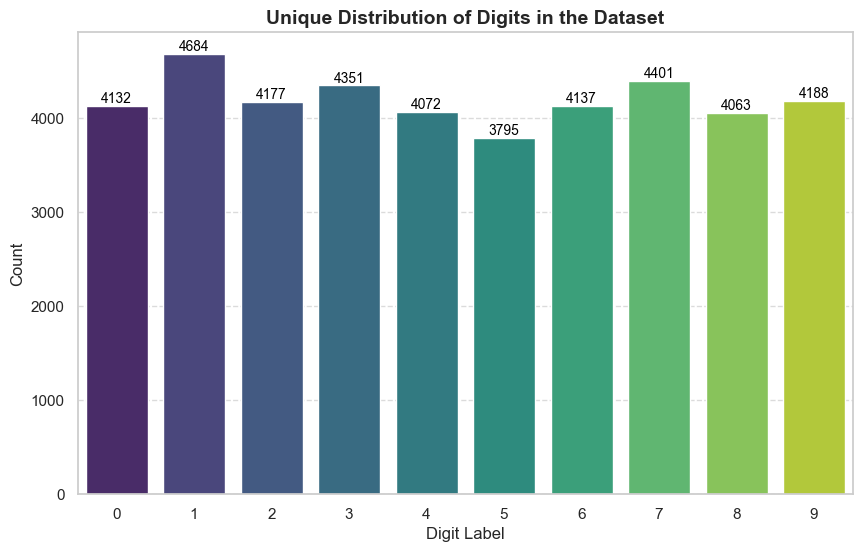

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a custom style and color palette
sns.set_theme(style="whitegrid")
colors = sns.color_palette("viridis", len(train['label'].unique()))

plt.figure(figsize=(10, 6))
ax = sns.countplot(
    x=train['label'],
    palette=colors,
    order=sorted(train['label'].unique())  # Ensure labels are in order
)

for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='center', 
        xytext=(0, 5), textcoords='offset points', 
        fontsize=10, color='black'
    )

plt.title('Unique Distribution of Digits in the Dataset', fontsize=14, fontweight='bold')
plt.xlabel('Digit Label', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

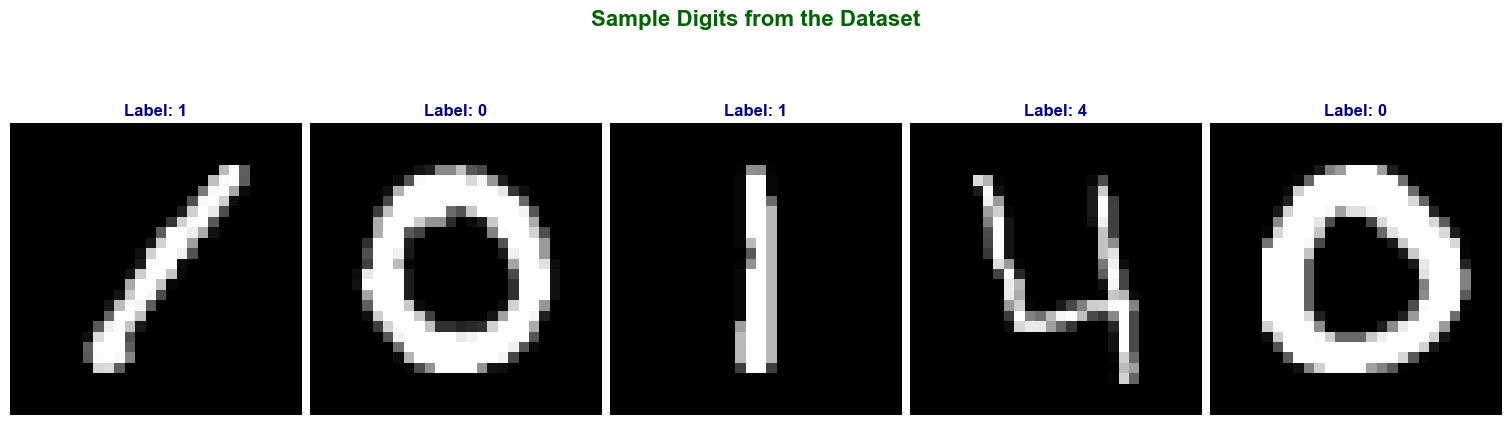

In [16]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5), constrained_layout=True)

# Iterate through the first 5 rows of the dataset
for i, ax in enumerate(axes):
    ax.imshow(train.iloc[i, 1:].values.reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {train['label'][i]}", fontsize=12, fontweight='bold', color='darkblue')
    ax.axis('off')  # Hide axes for a cleaner look

# Add an overall title for the figure
fig.suptitle("Sample Digits from the Dataset", fontsize=16, fontweight='bold', color='darkgreen')

# Show the plot
plt.show()


# Data Processing

In [17]:
# Separate features and labels
X = train.drop('label', axis=1).values / 255.0  # Normalize pixel values
y = train['label'].values

X = X.reshape(-1, 28, 28, 1)  
y = tf.keras.utils.to_categorical(y, 10)  

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")

Training data shape: (33600, 28, 28, 1)
Validation data shape: (8400, 28, 28, 1)


# CNN Model

In [18]:
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential([
    # Input Layer
    Input(shape=(28, 28, 1)),

    # First Convolutional Block
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    # Second Convolutional Block
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    # Third Convolutional Block
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.5),

    # Fully Connected Layers
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 10, 10, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 2, 2, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 2, 2, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 692,682 (2.64 MB)

 Trainable params: 691,786 (2.64 MB)

 Non-trainable params: 896 (3.50 KB)

# Compilation Model

In [19]:
# Compile the model
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

# Data Augmentation

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=12,      
    zoom_range=0.15,         
    width_shift_range=0.15,  
    height_shift_range=0.15  
)

datagen.fit(X_train)

# Train Modeling

In [23]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64), 
    validation_data=(X_val, y_val),              
    epochs=10,                                     
    callbacks=[early_stopping, reduce_lr]          
)

Epoch 1/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 144s 275ms/step - accuracy: 0.9849 - loss: 0.0555 - val_accuracy: 0.9938 - val_loss: 0.0206 - learning_rate: 5.0000e-04
Epoch 2/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 142s 270ms/step - accuracy: 0.9844 - loss: 0.0550 - val_accuracy: 0.9938 - val_loss: 0.0179 - learning_rate: 5.0000e-04
Epoch 3/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 140s 266ms/step - accuracy: 0.9856 - loss: 0.0513 - val_accuracy: 0.9945 - val_loss: 0.0184 - learning_rate: 5.0000e-04
Epoch 4/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 142s 270ms/step - accuracy: 0.9859 - loss: 0.0482 - val_accuracy: 0.9954 - val_loss: 0.0145 - learning_rate: 5.0000e-04
Epoch 5/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 137s 261ms/step - accuracy: 0.9882 - loss: 0.0432 - val_accuracy: 0.9943 - val_loss: 0.0187 - learning_rate: 5.0000e-04
Epoch 6/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 138s 262ms/step - accuracy: 0.9867 - loss: 0.0473 - val_accuracy: 0.9929 - val_loss: 0.0205 - learning_rate: 5.0000e-04
Epoch 7/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 

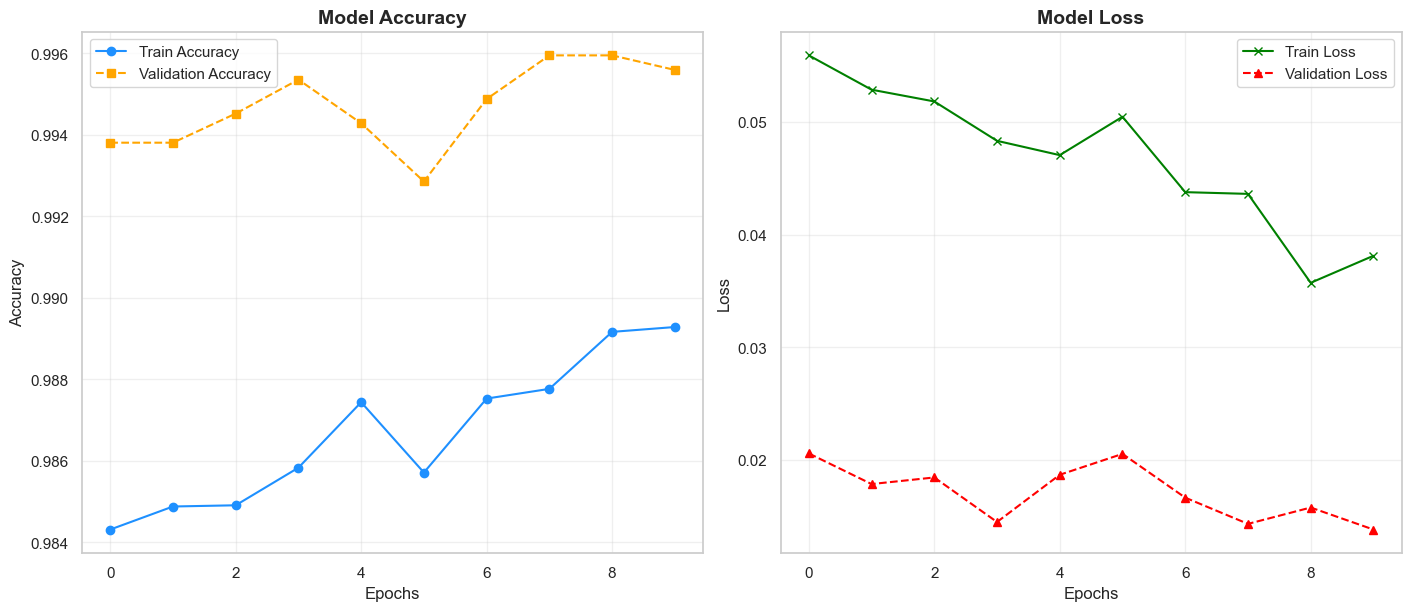

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), constrained_layout=True)

# Plot training and validation accuracy
axes[0].plot(history.history['accuracy'], label='Train Accuracy', color='dodgerblue', linestyle='-', marker='o', markersize=6)
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', linestyle='--', marker='s', markersize=6)
axes[0].set_title('Model Accuracy', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epochs', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# Plot training and validation loss
axes[1].plot(history.history['loss'], label='Train Loss', color='green', linestyle='-', marker='x', markersize=6)
axes[1].plot(history.history['val_loss'], label='Validation Loss', color='red', linestyle='--', marker='^', markersize=6)
axes[1].set_title('Model Loss', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epochs', fontsize=12)
axes[1].set_ylabel('Loss', fontsize=12)
axes[1].grid(True, alpha=0.3)
axes[1].legend()

# Show the plot
plt.show()

# Model Evaluation

In [25]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)

# Print the validation accuracy
print(f"Validation Accuracy: {val_accuracy:.4f}")

263/263 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.9957 - loss: 0.0179
Validation Accuracy: 0.9956


# Making predictions

In [26]:
test_normalized = test / 255.0
test_normalized = test_normalized.values.reshape(-1, 28, 28, 1)

predictions = np.argmax(model.predict(test_normalized), axis=1)

submission = pd.DataFrame({'ImageId': range(1, len(predictions) + 1), 'Label': predictions})
submission.to_csv('submission.csv', index=False)

print("Submission file saved as 'submission.csv'")

875/875 ━━━━━━━━━━━━━━━━━━━━ 31s 35ms/step
Submission file saved as 'submission.csv'
